In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

# Machine Learning with Scikit_learn


![intro](img/intro.png)



## Implementing a MLP Neural Network with Scikit_learn

![model](img/model.png)

## The model

![NN](img/NN.png)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#########################################################
# Create and parametrize a MLP neural network classifier
#########################################################

clf = MLPClassifier(activation='tanh', hidden_layer_sizes=(20,),
       learning_rate='constant', learning_rate_init=0.01, max_iter=500, solver='adam', tol=1e-05,
       alpha=0.000015, batch_size=4, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       momentum=0.8,
       nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
       validation_fraction=0.3, verbose=False,
       warm_start=False)
print(clf)

MLPClassifier(activation='tanh', alpha=1.5e-05, batch_size=4,
              hidden_layer_sizes=(20,), learning_rate_init=0.01, max_iter=500,
              momentum=0.8, random_state=11, tol=1e-05,
              validation_fraction=0.3)


### About parameters 

Please first read the MLPClassifier [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to understand all parameters of the constructor.


1. hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)

    The ith element represents the number of neurons in the ith hidden layer.

2. activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’

    Activation function for the hidden layer.

    ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
    ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
    ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
    ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

3. learning_rate : {‘constant’, ‘invscaling’, ‘adaptive’}, default ‘constant’

4. learning_rate_init : double, optional, default 0.001

5. max_iter : int, optional, default 200

    Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

6. tol, float, default=1e-4

    Tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to ‘adaptive’, convergence is considered to be reached and training stops.


7. early_stopping : bool, default False

    Whether to use early stopping to terminate training when validation score is not improving. If set to true, it will automatically keep 10% of training data as validation and terminate training when validation score is not improving by at least tol for two consecutive epochs. Only effective when solver=’sgd’ or ‘adam’
    
8. alpha

    Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.


## NN training

In [ ]:
clf.predict([1,1])

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

![train](img/train.png)

<ol>
    <li> Training data is propagated to the MLP through input layers. It passes through the hidden layers, if any forwarding outputs of activation functions to the next layer. Finally the output is generated at the output layer by applying activation functions. </li>
    <li> The predicted output will be compared with actual output and hence error will be calculated. </li>
    <li> If error>0, apply backpropagation methodology to modify weights starting from output layer moving towards input layer. </li>
    <li> Check accuracy score. If satisfied, stop. Else, go to step 1. </li>
</ol>


![training](img/training.png)

### a dummy dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

In [ ]:
# Create artificial dataset 
X, y = make_moons(n_samples=500, noise=0.3, random_state=1)

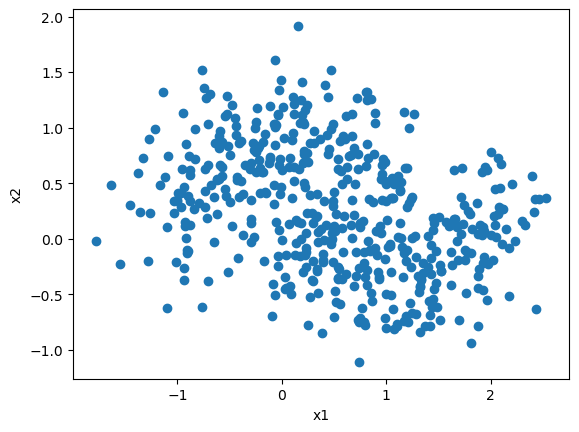

In [ ]:
# X is a 2d array: two featurs
plt.scatter(X[:,0], X[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
# Print beginning of training dataset (for verification)
print("Number of data examples = ", y.size)
print()
print("  first ", round(y.size/100), " examples" )
print("[  Input_features  ]\t[Target_output]")
for i in range( int(round(y.size/100) )):
    print( X[i],'\t', y[i])

Number of data examples =  500

  first  5  examples
[  Input_features  ]	[Target_output]
[0.50316464 0.11135559] 	 1
[ 1.06597837 -0.63035547] 	 1
[0.95663377 0.58199637] 	 0
[0.33961202 0.40713937] 	 0
[ 2.17952333 -0.08488181] 	 1


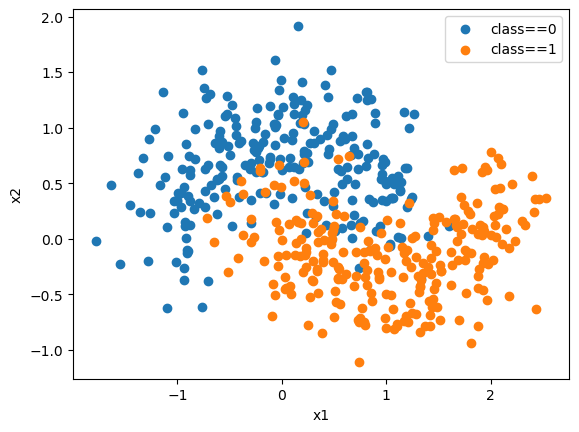

In [ ]:
# y is the label. Two cataegories: 0 ro 1
plt.scatter(X[:,0][y==0], X[:,1][y==0], label='class==0')
plt.scatter(X[:,0][y==1], X[:,1][y==1], label='class==1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### preparing the train/test dataset

In [ ]:
# Preprocess dataset, and split into training and test part
#X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
#Y_train_OneHot = np.eye(2)[y_train]
#Y_test_OneHot = np.eye(2)[y_test]

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(500, 2)
(250, 2)
(250, 2)



PLOT OF TRAINING EXAMPLES AND TEST DATASET
Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]


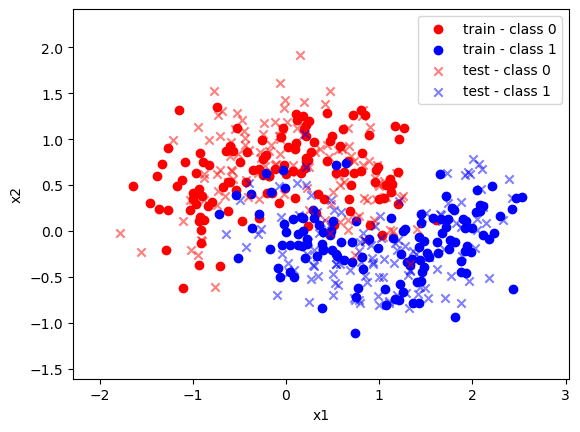

In [ ]:
# Plot training+testing dataset
################################

# Plot the training points...
plt.scatter(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], color='red', label='train - class 0')
plt.scatter(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], color='blue', label='train - class 1')
#   ...and testing points
plt.scatter(X_test[:, 0][y_test==0], X_test[:, 1][y_test==0], color='red', alpha=0.5, label='test - class 0', marker='x')
plt.scatter(X_test[:, 0][y_test==1], X_test[:, 1][y_test==1], color='blue', alpha=0.5, label='test - class 1', marker='x')

# Define limits/scale of plot axis
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)


plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

# Actually render the plot
print()
print("PLOT OF TRAINING EXAMPLES AND TEST DATASET")
print("Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]")

plt.show()

### performing the fit

In [ ]:
# Train the MLP classifier on training dataset
clf.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=1.5e-05, batch_size=4,
              hidden_layer_sizes=(20,), learning_rate_init=0.01, max_iter=500,
              momentum=0.8, random_state=11, tol=1e-05,
              validation_fraction=0.3)

In [ ]:
clf.n_features_in_

2

In [ ]:
clf.n_layers_

3

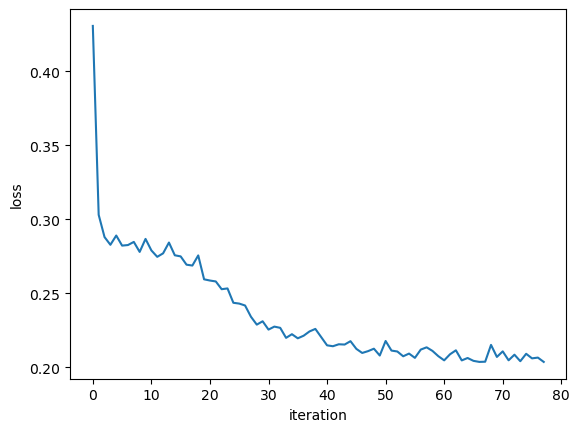

In [ ]:
# Plot the loss as a function of the iteration step
plt.plot(clf.loss_curve_)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

### inspect weights values

In [ ]:
print("weights between input and first hidden layer:")
print(clf.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(clf.coefs_[1])

weights between input and first hidden layer:
[[ 0.00512376 -0.17113388 -1.41150885  0.09287358  1.12432379  0.83885445
  -0.21613175  1.08828152  0.53492259  0.49286109 -0.16429011 -0.07551093
   0.69541097  1.8084554   0.15475569  2.66807797 -0.40406777 -0.64578231
  -2.34666916  0.14464611]
 [-0.0036449   0.0378279   0.13058545  0.04607868 -1.93381556 -1.40950642
   0.01409213 -0.12663718 -0.6363367  -0.28505405 -0.01269358 -0.03856316
  -0.84848618  2.61572536  0.01041961  1.7993451   0.43946342  0.7404089
   0.07958882  0.02779181]]

weights between first hidden and second hidden layer:
[[-2.59962964e-04]
 [-3.16926164e-02]
 [-7.08535620e-01]
 [ 7.05557884e-03]
 [ 1.38824618e+00]
 [ 1.23463969e+00]
 [-2.35385147e-02]
 [ 7.56127612e-01]
 [ 6.20293183e-01]
 [ 8.88940363e-01]
 [-1.85642717e-02]
 [-4.44053705e-03]
 [ 9.84896200e-01]
 [-1.17000056e+00]
 [ 1.43723415e-02]
 [-2.49013232e+00]
 [-2.54600259e-01]
 [-9.68737910e-01]
 [-2.32459840e+00]
 [ 1.16693678e-02]]


In [ ]:
# bias values
clf.intercepts_

[array([ 0.00210131,  0.03848703, -0.7792989 ,  0.03119166, -1.22675395,
        -0.93142471,  0.04513064,  0.63114731, -0.35443656, -0.1326195 ,
         0.04825699, -0.01206288, -0.77692859, -0.6513685 , -0.04880077,
        -1.30939536, -0.13600374,  0.68422098, -1.57792647, -0.0541889 ]),
 array([0.14791277])]

In [ ]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [ 0.00512376 -0.0036449 ], 
0 1 [-0.17113388  0.0378279 ], 
0 2 [-1.41150885  0.13058545], 
0 3 [0.09287358 0.04607868], 
0 4 [ 1.12432379 -1.93381556], 
0 5 [ 0.83885445 -1.40950642], 
0 6 [-0.21613175  0.01409213], 
0 7 [ 1.08828152 -0.12663718], 
0 8 [ 0.53492259 -0.6363367 ], 
0 9 [ 0.49286109 -0.28505405], 
0 10 [-0.16429011 -0.01269358], 
0 11 [-0.07551093 -0.03856316], 
0 12 [ 0.69541097 -0.84848618], 
0 13 [1.8084554  2.61572536], 
0 14 [0.15475569 0.01041961], 
0 15 [2.66807797 1.7993451 ], 
0 16 [-0.40406777  0.43946342], 
0 17 [-0.64578231  0.7404089 ], 
0 18 [-2.34666916  0.07958882], 
0 19 [0.14464611 0.02779181], 

1 0 [-2.59962964e-04 -3.16926164e-02 -7.08535620e-01  7.05557884e-03
  1.38824618e+00  1.23463969e+00 -2.35385147e-02  7.56127612e-01
  6.20293183e-01  8.88940363e-01 -1.85642717e-02 -4.44053705e-03
  9.84896200e-01 -1.17000056e+00  1.43723415e-02 -2.49013232e+00
 -2.54600259e-01 -9.68737910e-01 -2.32459840e+00  1.16693678e-02], 



![NN](img/NN.png)

## making a prediction

![trained_model](img/trained_model.png)

In [ ]:
clf.predict(X_train)
#The main reason, why we train a classifier is to predict results for new samples. We can do this with the predict method. The method returns a predicted class for a sample, in our case a "0" or a "1" :

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

## Evaluate acuracy on test data


![test](img/test.png)

In [ ]:
pred_test = clf.predict(X_test)
pred_test
#The main reason, why we train a classifier is to predict results for new samples. We can do this with the predict method. The method returns a predicted class for a sample, in our case a "0" or a "1" :

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [ ]:
#Instead of just looking at the class results, we can also use the predict_proba method to get the probability estimates.

pred_prob_test = clf.predict_proba(X_test)[:, 1]
pred_prob_train = clf.predict_proba(X_train)[:, 1]

Text(0, 0.5, 'prediction class')

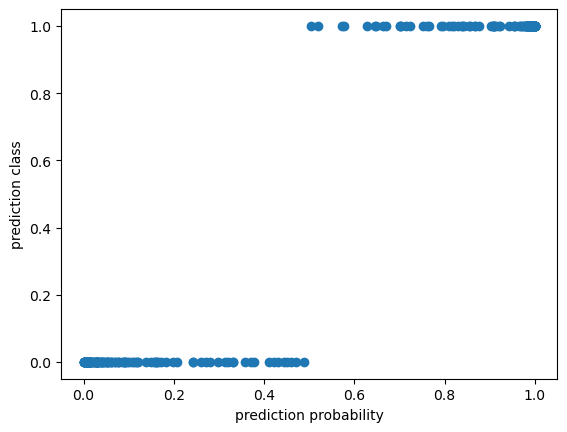

In [ ]:
plt.scatter(pred_prob_test, pred_test)
plt.xlabel('prediction probability')
plt.ylabel('prediction class')

Text(0.5, 0, 'MLP out')

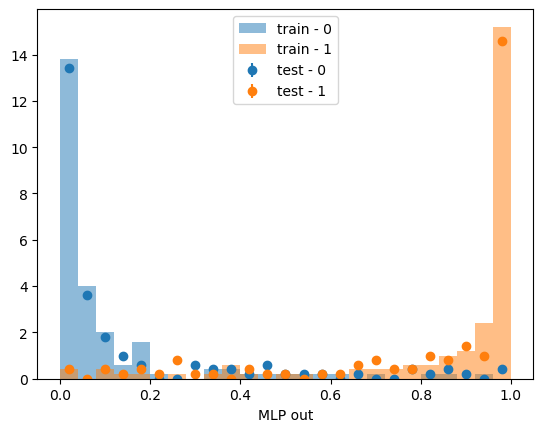

In [ ]:
bi = 25

plt.hist(pred_prob_train[y_train==0], bins=bi, range=[0, 1], density=True, label='train - 0', alpha=0.5)
plt.hist(pred_prob_train[y_train==1], bins=bi, range=[0, 1], density=True, label='train - 1', alpha=0.5)

bin_counts_test_0, bin_edges = np.histogram(pred_prob_test[y_test==0], bins=bi, range=[0, 1], density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.errorbar(x=bin_centres, y=bin_counts_test_0, yerr=0, fmt='o', capsize=0, color='C0', label='test - 0')

bin_counts_test_1, bin_edges = np.histogram(pred_prob_test[y_test==1], bins=bi, range=[0, 1], density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.errorbar(x=bin_centres, y=bin_counts_test_1, yerr=0, fmt='o', capsize=0, color='C1', label='test - 1')

#plt.yscale('log')
plt.legend()
plt.xlabel('MLP out')

### See some metrics

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Compute confusion matrix to evaluate the accuracy of a classification.
By definition a confusion matrix C is such that C_ij is equal to the number of observations known to be in group and predicted to be in group j.



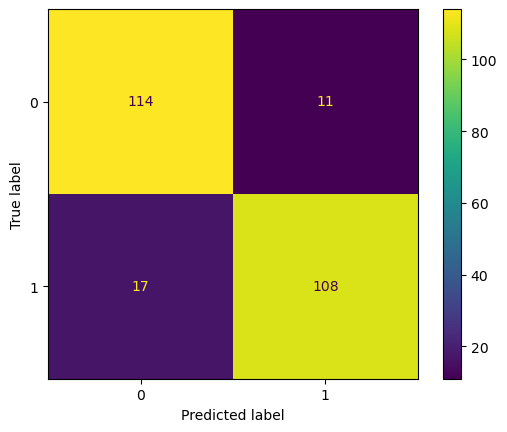

In [33]:
cm = confusion_matrix(y_test, pred_test)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [27]:
114/(114+7)

0.9421487603305785

In [28]:
106/(106+7)

0.9380530973451328

In [34]:
# Evaluate acuracy on test data
score = clf.score(X_test,y_test)
print("precision (on test set) = ", score)

precision (on test set) =  0.888


In [35]:

from sklearn.metrics import classification_report
#Predicting y for X_val
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       125
           1       0.91      0.86      0.89       125

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



- Precision is defined as the number of true positives over the number of true positives plus the number of false positives.

- Recall is defined as the number of true positives over the number of true positives plus the number of false negatives.

![test](img/metrics.png)

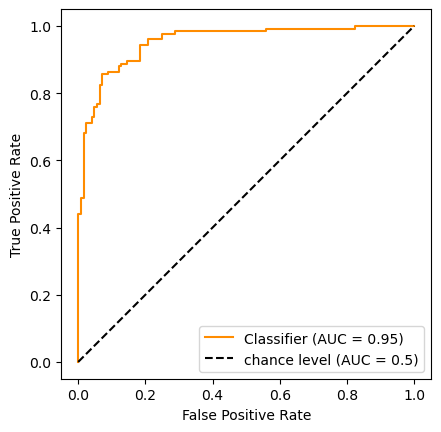

In [36]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_test,
    pred_prob_test,
    color="darkorange",
)

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### Plot the decision boundary. 

For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].

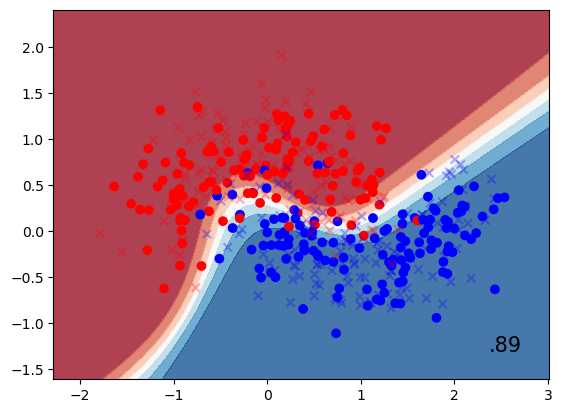

In [37]:
#   

cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    
h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Compute class probabilities for each mesh point
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3)

# Axis ranges 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


# Print acuracy on plot
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

# Actually plot
plt.show()

## grid-search of optimal set of learning hyper-parameters

You can have a try at using grid-search and cross-validation to find optimal set of learning hyper-parameters (see code below).

WARNING: GridSearchCV launches many successive training sessions, so can be rather long to execute if you compare too many combinations


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

param_grid = [
  {'hidden_layer_sizes': [(5,), (10,), (15,), (25,)], 
   'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
   'alpha': [0.00001, 0.0001, 0.001, 0.01]}
 ]
#print(param_grid)

# Cross-validation grid-search
scores = ['precision']#, 'recall']
for score in scores:
    clf = GridSearchCV( MLPClassifier(activation='tanh', alpha=0.0015, batch_size=4, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.005, max_iter=500, momentum=0.8,
       nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
       solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
       warm_start=False), 
       param_grid, cv=3, scoring='%s_macro' % score)
    
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
    print()
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Best parameters set found on development set:

{'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01}

Grid scores on development set:

0.878 (+/-0.015) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.003}
0.890 (+/-0.007) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01}
0.879 (+/-0.006) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.03}
0.875 (+/-0.013) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.1}
0.873 (+/-0.043) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.003}
0.869 (+/-0.020) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}
0.849 (+/-0.076) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.03}
0.873 (+/-0.024) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.1}
0.873 (+/-0.014) for {'alpha': 1e-05, 'hidden_layer_sizes': (15,), 'learning_rate_init': 0

Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.